In [7]:
df<-read.csv("../movies/temp_mining_prever2.csv",fileEncoding = 'utf-8',stringsAsFactors = F)
actor_score_df <- read.csv("../movies/ju_score.csv" ,fileEncoding = 'utf-8',stringsAsFactors = F)

In [8]:
head(df,2)

누적관객수,스크린수,상영횟수,개봉일,배급사,등급,장르,감독,주연,제작사,cluster,조연,감독_주연조연시너지수,감독_주연조연악연수,상영횟수당누적관객수,스크린점유율,배우누적점수,배우점수,배우수
7232387,1299,138226,2017-12-27,CJ ENM,15세이상관람가,드라마,장준환,"김윤석,하정우,유해진,김태리,박희순,이희준",(주)우정필름,4,"유승목,현봉식,박지환,이용직,박지홍,김경덕,김의성,최광일,김수진,김종수,김혜정,조우진,임철형,이창훈,서현우,이현균,김승훈,박경혜,이화룡",6,0,52.32291,46.96312,62.17949,16,6
2535450,340,54566,2007-02-14,CJ ENM,15세이상관람가,"드라마,코미디",윤제균,"임창정,하지원",(주)두사부필름,1,"주현,정두홍,이훈,강예원,박창익,박유선,고태호",0,0,46.46575,17.21519,8.00000,7,2


In [11]:
head(actor_score_df,1)

주연,총횟수,cluster,횟수,누적관객수__개봉일스크린수,누적관객수__스크린수,누적관객수__상영횟수,평균_관람객_개스크,평균_관람객_스크,평균_관람객_상횟,관람객개스크점수,점수ver1
강동원,17,1,1,13949.42,10547.12,101.5337,13949.42,10547.12,101.5337,13949.42,0


In [10]:
df$배우점수개스크 <- 0
df$배우점수개스크ver2 <- 0

In [11]:
for(i in 1:nrow(df)){
    a <- unlist(strsplit(df$주연[i],","))
    x<-c()
    y<-c()
    for(j in 1:nrow(actor_score_df)){
        if( actor_score_df$주연[j] %in% a ){
            
            x<- c(x,actor_score_df$평균_관람객_개스크[j])
            y<- c(y,actor_score_df$관람객개스크점수[j])
        }
        
    }
    if(length(x)>=1){
        
    df$배우점수개스크[i] = max(x)
    df$배우점수개스크ver2[i] = max(y)
    }
        
}


In [19]:
df[df$배우점수개스크==0,"배우점수개스크"] = 10477.0861787964

In [21]:
df[df$관람객개스크점수 ==0,"관람객개스크점수"] ==20007.4599843946

logical(0)

[1] 10827.99

[1] 20007.46

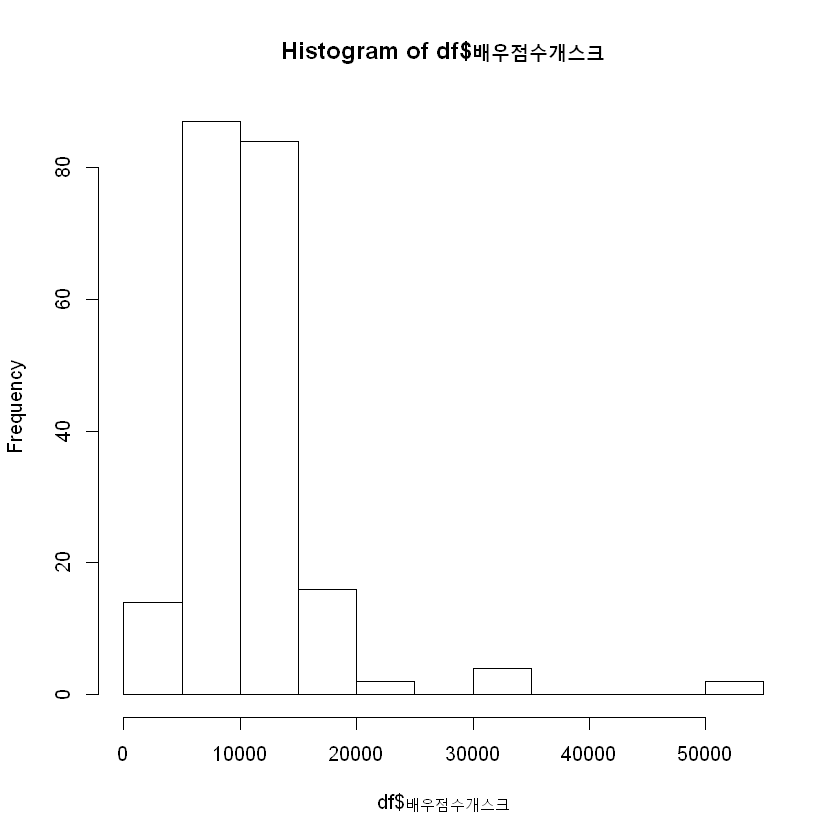

In [20]:
hist(df$배우점수개스크)
mean(df$배우점수개스크)
mean(df$배우점수개스크ver2)

In [14]:
actor_score_df$점수ver1 <- actor_score_df$평균_관람객_스크 *(actor_score_df$횟수^(1/2) + (actor_score_df$cluster*2))

In [15]:
write.csv(df,"../movies/temp_mining_ver3.csv",row.names = F, fileEncoding = "utf-8")

In [24]:
df2<-read.csv("../movies/data_over3mil.csv" ,stringsAsFactors = F)

In [34]:
diract <- read.csv("../movies/감독_배우_점수.csv")

In [26]:
head(df,1)

누적관객수,스크린수,상영횟수,개봉일,배급사,등급,장르,감독,주연,제작사,cluster,조연,감독_주연조연시너지수,감독_주연조연악연수,상영횟수당누적관객수,스크린점유율,배우누적점수,배우점수,배우수
7232387,1299,138226,2017-12-27,CJ ENM,15세이상관람가,드라마,장준환,"김윤석,하정우,유해진,김태리,박희순,이희준",(주)우정필름,4,"유승목,현봉식,박지환,이용직,박지홍,김경덕,김의성,최광일,김수진,김종수,김혜정,조우진,임철형,이창훈,서현우,이현균,김승훈,박경혜,이화룡",6,0,52.32291,46.96312,62.17949,16,6


In [35]:
head(diract,1)

감독_배우,점수
강우석_정재영,0


In [28]:
df2$감독배우시너지 <- 0

In [31]:
head(df2,1)

영화명,누적매출액,누적관객수,스크린수,상영횟수,개봉일,배급사,등급,장르,감독,주연,제작사,조연,cluster,감독배우시너지
1987,58169776145,7232387,1299,138226,2017-12-27,CJ ENM,15세이상관람가,드라마,장준환,"김윤석,하정우,유해진,김태리,박희순,이희준",(주)우정필름,"유승목,현봉식,박지환,이용직,박지홍,김경덕,김의성,최광일,김수진,김종수,김혜정,조우진,임철형,이창훈,서현우,이현균,김승훈,박경혜,이화룡",3,0


In [30]:
for(i in 1:nrow(df2)){
    df2$조연[i] <- substr(df2$조연[i],2,nchar(df2$조연[i]))
}

영화명,누적매출액,누적관객수,스크린수,상영횟수,개봉일,배급사,등급,장르,감독,주연,제작사,cluster,조연,감독_주연시너지수,감독_주연악연수,감독_조연시너지수,감독_조연악연수,감독_주연조연시너지수
1987,58169776145,7232387,1299,138226,2017-12-27,(주)씨제이이엔엠,15세이상관람가,드라마,장준환,"김윤석,하정우,유해진,김태리,박희순,이희준",(주)우정필름,4,",유승목,현봉식,박지환,이용직,박지홍,김경덕,김의성,최광일,김수진,김종수,김혜정,조우진,임철형,이창훈,서현우,이현균,김승훈,박경혜,이화룡",6,0,0,0,6
1번가의 기적,15494122100,2535450,340,54566,2007-02-14,CJ ENM,15세이상관람가,"드라마,코미디",윤제균,"임창정,하지원",(주)두사부필름,1,",주현,정두홍,이훈,강예원,박창익,박유선,고태호",0,0,0,0,0
26년,21242367145,2963652,611,50679,2012-11-29,"(주)인벤트스톤,영화사청어람(주)",15세이상관람가,"액션,드라마",조근현,"진구,한혜진,임슬옹",영화사청어람(주),2,",배수빈,이경영,장광,이미도,조덕제,김의성,안석환,민복기,구성환,김민재,최귀화,김태수,장영",0,0,0,0,0
7광구,19391653500,2242510,812,47346,2011-08-04,(주)씨제이이엔엠,15세이상관람가,"SF,액션,스릴러",김지훈,"하지원,안성기,오지호,박철민,송새벽","(주)제이케이필름,(주)씨제이이엔엠",1,",박정학,이한위,박영수,차예련,오민석",2,0,1,0,3
7급 공무원,26380710000,4039891,475,90779,2009-04-22,롯데쇼핑㈜롯데엔터테인먼트,12세이상관람가,"코미디,액션,드라마,범죄",신태라,"김하늘,강지환","(주)하리마오픽쳐스,(주)영화사수작,(주)디씨지플러스",2,",류승룡,장영남,강신일,도마첸코 바딤,엘리자베스 수진 포드,코디 헌터,장남열,김정팔,유승목,김형종,김형범,박성민",1,0,2,0,3
7번방의 선물,91431950670,12811213,866,166817,2013-01-23,(주)넥스트엔터테인먼트월드(NEW),15세이상관람가,"코미디,드라마",이환경,"류승룡,박신혜,갈소원,오달수,박원상,김정태,정만식,김기천","(주)화인웍스,(주)씨엘엔터테인먼트",5,",박길수,조재윤,조덕현",0,0,0,0,0
82년생 김지영,30298542310,3678156,1486,145441,2019-10-23,롯데컬처웍스(주)롯데엔터테인먼트,12세이상관람가,드라마,김도영,"정유미,공유",(주)봄바람영화사,2,",김미경,공민정,박성연,이봉련,김성철,이얼,김미경,손성찬,강애심,류아영,김정영",2,0,6,0,8
가문의 부활 - 가문의 영광3,15996330400,2598859,444,51434,2006-09-21,(주)쇼박스,15세관람가,코미디,정용기,"신현준,탁재훈,김원희,김수미",(주)태원엔터테인먼트,1,",공형진,신이,임형준,정준하,김용건,김해곤",3,0,1,1,4
가문의 영광4 - 가문의 수난,17792219500,2368267,537,48432,2011-09-07,(주)넥스트엔터테인먼트월드(NEW),15세이상관람가,코미디,정태원,"김수미,신현준,탁재훈,임형준,정준하,현영",(주)태원엔터테인먼트,1,",정웅인,김지우,정만식,이재훈,윤주희,유상무,장동민,정주리,김예랑,김문학",0,0,0,0,0
가문의 위기(가문의 영광2),28622355500,4529876,351,61009,2005-09-07,(주)쇼박스,15세관람가,코미디,정용기,"신현준,김원희,김수미",(주)태원엔터테인먼트,3,",탁재훈,공형진,임형준,정준하,김해곤,정호빈",3,0,1,1,4


In [47]:
df2$감독주연 <- 0
df2$감독조연 <- 0

In [53]:
diract$감독_배우 <- as.character(diract$감독_배우)

In [54]:
str(diract)

'data.frame':	2607 obs. of  2 variables:
 $ 감독_배우: chr  "강우석_정재영" "강우석_강신일" "강우석_유해진" "강우석_탁트인" ...
 $ 점수     : int  0 1 2 1 1 1 1 1 1 -1 ...


In [68]:

for(i in 1:nrow(df2)){
    a <- unlist(strsplit(df2$주연[i],","))
    b <- unlist(strsplit(df2$조연[i],","))

    for(j in 1:nrow(diract)){
        c <- unlist(strsplit(diract$감독_배우[j],"_"))
        if(c[1] %in%  unlist(strsplit(df2$감독[i], ",")) & c[2] %in% a){
            df2$감독주연[i] = df2$감독주연[i] + 1
        }
        if(c[1] %in%  unlist(strsplit(df2$감독[i],",")) & c[2] %in% b){
            df2$감독조연[i] = df2$감독조연[i] + 1
        }
        
    }
}

In [67]:
unlist(strsplit(df2$주연[1],","))

[1] "김윤석" "하정우" "유해진" "김태리" "박희순" "이희준"

In [66]:
unlist(strsplit(diract$감독_배우[1],"_"))

[1] "강우석"

In [69]:
head(df2)


영화명,누적매출액,누적관객수,스크린수,상영횟수,개봉일,배급사,등급,장르,감독,주연,제작사,조연,cluster,감독배우시너지,감독주연,감독조연
1987,58169776145,7232387,1299,138226,2017-12-27,CJ ENM,15세이상관람가,드라마,장준환,"김윤석,하정우,유해진,김태리,박희순,이희준",(주)우정필름,"유승목,현봉식,박지환,이용직,박지홍,김경덕,김의성,최광일,김수진,김종수,김혜정,조우진,임철형,이창훈,서현우,이현균,김승훈,박경혜,이화룡",3,0,6,0
7급 공무원,26380710000,4039891,475,90779,2009-04-22,롯데쇼핑㈜롯데엔터테인먼트,12세이상관람가,"코미디,액션,드라마,범죄",신태라,"김하늘,강지환","(주)하리마오픽쳐스,(주)영화사수작,(주)디씨지플러스","류승룡,장영남,강신일,도마첸코 바딤,엘리자베스 수진 포드,코디 헌터,장남열,김정팔,유승목,김형종,김형범,박성민",1,0,2,3
82년생 김지영,30298542310,3678156,1486,145441,2019-10-23,롯데컬처웍스(주)롯데엔터테인먼트,12세이상관람가,드라마,김도영,"정유미,공유",(주)봄바람영화사,"김미경,공민정,박성연,이봉련,김성철,이얼,김미경,손성찬,강애심,류아영,김정영",1,0,2,6
가문의 위기(가문의 영광2),28622355500,4529876,351,61009,2005-09-07,(주)쇼박스,15세관람가,코미디,정용기,"신현준,김원희,김수미",(주)태원엔터테인먼트,"탁재훈,공형진,임형준,정준하,김해곤,정호빈",2,0,3,3
감기,21774884000,3117859,806,55046,2013-08-14,아이러브시네마,15세이상관람가,"드라마,어드벤처,액션",김성수,"장혁,수애,박민하","아이러브시네마,(주)아이필름홀딩스,(주)씨제이이엔엠","유해진,이희준,김기현,이상엽,박효주,박정민,보리스 스타웃,김문수,최병모,장경업,앤드류 윌리엄 브랜드",1,0,3,7
감시자들,39380162179,5508017,949,100309,2013-07-03,(주)넥스트엔터테인먼트월드(NEW),15세이상관람가,"범죄,액션","조의석,김병서","설경구,정우성,한효주",영화사 집,"김병옥,진경,준호,손민석,김대진,이태형,강신하,이동휘,이화정,박지훈,김지훈,성일,변요한,장원형,박지연,최원,변정현,이동진,이도윤,정재호,김준우,이현균",2,0,6,8


In [70]:
df2$감독배우시너지 <- df2$감독주연 + (df2$감독조연 * 0.83)

In [73]:
df2 <- df2[,-c(16,17)]

In [74]:
head(df2,1)

영화명,누적매출액,누적관객수,스크린수,상영횟수,개봉일,배급사,등급,장르,감독,주연,제작사,조연,cluster,감독배우시너지
1987,58169776145,7232387,1299,138226,2017-12-27,CJ ENM,15세이상관람가,드라마,장준환,"김윤석,하정우,유해진,김태리,박희순,이희준",(주)우정필름,"유승목,현봉식,박지환,이용직,박지홍,김경덕,김의성,최광일,김수진,김종수,김혜정,조우진,임철형,이창훈,서현우,이현균,김승훈,박경혜,이화룡",3,6


In [75]:
head(df,1)

누적관객수,스크린수,상영횟수,개봉일,배급사,등급,장르,감독,주연,제작사,cluster,조연,감독_주연조연시너지수,감독_주연조연악연수,상영횟수당누적관객수,스크린점유율,배우누적점수,배우점수,배우수
7232387,1299,138226,2017-12-27,CJ ENM,15세이상관람가,드라마,장준환,"김윤석,하정우,유해진,김태리,박희순,이희준",(주)우정필름,4,"유승목,현봉식,박지환,이용직,박지홍,김경덕,김의성,최광일,김수진,김종수,김혜정,조우진,임철형,이창훈,서현우,이현균,김승훈,박경혜,이화룡",6,0,52.32291,46.96312,62.17949,16,6


In [76]:
df2$스크린점유율 <- 0

In [92]:
for( i in 1:nrow(df2)){
    for(j in 1:nrow(df)){
        if(df2$누적관객수[i] == df$누적관객수[j] ){
            df2$스크린점유율[i] <- df$스크린점유율[j]
            df2$감독[i] <- df$감독[j]
        }
    }
}

In [93]:
df2

영화명,누적매출액,누적관객수,스크린수,상영횟수,개봉일,배급사,등급,장르,감독,주연,제작사,조연,cluster,감독배우시너지,스크린점유율,감독점수
1987,58169776145,7232387,1299,138226,2017-12-27,CJ ENM,15세이상관람가,드라마,장준환,"김윤석,하정우,유해진,김태리,박희순,이희준",(주)우정필름,"유승목,현봉식,박지환,이용직,박지홍,김경덕,김의성,최광일,김수진,김종수,김혜정,조우진,임철형,이창훈,서현우,이현균,김승훈,박경혜,이화룡",3,6.00,46.96312,4.000000
7급 공무원,26380710000,4039891,475,90779,2009-04-22,롯데쇼핑㈜롯데엔터테인먼트,12세이상관람가,"코미디,액션,드라마,범죄",신태라,"김하늘,강지환","(주)하리마오픽쳐스,(주)영화사수작,(주)디씨지플러스","류승룡,장영남,강신일,도마첸코 바딤,엘리자베스 수진 포드,코디 헌터,장남열,김정팔,유승목,김형종,김형범,박성민",1,4.49,23.79760,3.000000
82년생 김지영,30298542310,3678156,1486,145441,2019-10-23,롯데컬처웍스(주)롯데엔터테인먼트,12세이상관람가,드라마,김도영,"정유미,공유",(주)봄바람영화사,"김미경,공민정,박성연,이봉련,김성철,이얼,김미경,손성찬,강애심,류아영,김정영",1,6.98,48.26242,2.000000
가문의 위기(가문의 영광2),28622355500,4529876,351,61009,2005-09-07,(주)쇼박스,15세관람가,코미디,정용기,"신현준,김원희,김수미",(주)태원엔터테인먼트,"탁재훈,공형진,임형준,정준하,김해곤,정호빈",2,5.49,21.29854,2.833333
감기,21774884000,3117859,806,55046,2013-08-14,아이러브시네마,15세이상관람가,"드라마,어드벤처,액션",김성수,"장혁,수애,박민하","아이러브시네마,(주)아이필름홀딩스,(주)씨제이이엔엠","유해진,이희준,김기현,이상엽,박효주,박정민,보리스 스타웃,김문수,최병모,장경업,앤드류 윌리엄 브랜드",1,8.81,36.90476,2.333333
감시자들,39380162179,5508017,949,100309,2013-07-03,(주)넥스트엔터테인먼트월드(NEW),15세이상관람가,"범죄,액션","조의석,김병서","설경구,정우성,한효주",영화사 집,"김병옥,진경,준호,손민석,김대진,이태형,강신하,이동휘,이화정,박지훈,김지훈,성일,변요한,장원형,박지연,최원,변정현,이동진,이도윤,정재호,김준우,이현균",2,12.64,43.45238,0.000000
강철비,35490346466,4452850,1426,80359,2017-12-14,(주)넥스트엔터테인먼트월드(NEW),15세이상관람가,"액션,드라마",양우석,"정우성,곽도원","(주)와이웍스엔터테인먼트,(주)모팩","갑수,김의성,이경영,조우진,정원중,장현성,김명곤,박은혜,박선영,안미나,원진아,이재용,이윤건,김형종",2,6.98,51.55459,9.000000
강철중: 공공의 적 1-1,28638460100,4313101,707,74157,2008-06-19,"CJ ENM,(주)시네마서비스",15세이상관람가,"드라마,액션",강우석,"설경구,정재영","(주)시네마서비스글로벌,(주)시네마서비스","강신일,문성근,이문식,유해진,정원중,김남길,연제욱",1,4.49,35.27944,3.571429
거북이 달린다,20618276000,3024666,432,69946,2009-06-11,(주)쇼박스,15세이상관람가,"드라마,액션,범죄",이연우,"김윤석,정경호,견미리,선우선",(주)씨네이천,"김지나,신정근,최권,차은재,주진모,이무생,유하복,임형택,김희원",1,4.00,21.64329,3.500000
건축학개론,30223590400,4111237,593,106069,2012-03-22,롯데쇼핑㈜롯데엔터테인먼트,12세이상관람가,"멜로/로맨스,드라마",이용주,"엄태웅,한가인,이제훈,수지",(주)명필름,"조정석,유연석,김동주,이승호,김의성,박수영,조현철",1,5.49,28.49592,3.500000


In [79]:
dir<-read.csv("../movies/director_rank.csv")

In [82]:
head(dir,1)

감독,cluster,점수,cluster_점수
최동훈,3.5,47507.66,12.25


In [97]:
table(df2$감독)


강대규 강우석 강윤성 강형철 곽경택 김광식 김도영 김동원 김병우 김석윤 김성수 
     1      4      1      3      1      1      1      1      1      2      1 
김성훈 김영탁 김용화 김유진 김주호 김주환 김지운 김지훈 김태균 김학순 김한민 
     3      1      2      1      1      1      2      2      1      1      1 
김현석 나홍진 류승완 민규동 박광현 박누리 박정우 박찬욱 박훈정 봉준호 손용호 
     1      2      2      1      1      1      2      2      2      1      1 
신태라 심형래 양우석 우민호 원신연   유하 윤종빈 이계벽 이병헌 이상근 이석훈 
     1      1      1      1      2      1      3      1      1      1      3 
이승준 이언희 이연우 이용주 이원태 이일형 이재규 이재한 이정범 이준익   이한 
     1      1      1      1      1      1      2      2      1      1      1 
이해영 이해준 임순례 장재현 장준환 장창원 장철수   장훈 정용기 정윤철 정지영 
     1      1      1      1      1      1      1      1      1      1      1 
조범구 조성희 조의석 조정래 조진규 최국희 최동훈 최성현 한재림   허정 허진호 
     2      1      2      1      1      1      2      1      2      1      1 
황동혁 황인호 
     3      1 

In [96]:
for( i in 1:nrow(df2)){
    df2$감독[i] <- unlist(strsplit(df2$감독[i],","))[1]
}


In [81]:
df2$감독점수 <-0

In [100]:
for( i in 1:nrow(df2)){
    for(j in 1:nrow(dir)){
        if( df2$감독[i] == dir$감독[j]){
            df2$감독점수[i] = dir$cluster_점수[j]
        }
    }
}


In [101]:
head(df2,)

영화명,누적매출액,누적관객수,스크린수,상영횟수,개봉일,배급사,등급,장르,감독,주연,제작사,조연,cluster,감독배우시너지,스크린점유율,감독점수
1987,58169776145,7232387,1299,138226,2017-12-27,CJ ENM,15세이상관람가,드라마,장준환,"김윤석,하정우,유해진,김태리,박희순,이희준",(주)우정필름,"유승목,현봉식,박지환,이용직,박지홍,김경덕,김의성,최광일,김수진,김종수,김혜정,조우진,임철형,이창훈,서현우,이현균,김승훈,박경혜,이화룡",3,6.00,46.96312,4.000000
7급 공무원,26380710000,4039891,475,90779,2009-04-22,롯데쇼핑㈜롯데엔터테인먼트,12세이상관람가,"코미디,액션,드라마,범죄",신태라,"김하늘,강지환","(주)하리마오픽쳐스,(주)영화사수작,(주)디씨지플러스","류승룡,장영남,강신일,도마첸코 바딤,엘리자베스 수진 포드,코디 헌터,장남열,김정팔,유승목,김형종,김형범,박성민",1,4.49,23.79760,3.000000
82년생 김지영,30298542310,3678156,1486,145441,2019-10-23,롯데컬처웍스(주)롯데엔터테인먼트,12세이상관람가,드라마,김도영,"정유미,공유",(주)봄바람영화사,"김미경,공민정,박성연,이봉련,김성철,이얼,김미경,손성찬,강애심,류아영,김정영",1,6.98,48.26242,2.000000
가문의 위기(가문의 영광2),28622355500,4529876,351,61009,2005-09-07,(주)쇼박스,15세관람가,코미디,정용기,"신현준,김원희,김수미",(주)태원엔터테인먼트,"탁재훈,공형진,임형준,정준하,김해곤,정호빈",2,5.49,21.29854,2.833333
감기,21774884000,3117859,806,55046,2013-08-14,아이러브시네마,15세이상관람가,"드라마,어드벤처,액션",김성수,"장혁,수애,박민하","아이러브시네마,(주)아이필름홀딩스,(주)씨제이이엔엠","유해진,이희준,김기현,이상엽,박효주,박정민,보리스 스타웃,김문수,최병모,장경업,앤드류 윌리엄 브랜드",1,8.81,36.90476,2.333333
감시자들,39380162179,5508017,949,100309,2013-07-03,(주)넥스트엔터테인먼트월드(NEW),15세이상관람가,"범죄,액션",조의석,"설경구,정우성,한효주",영화사 집,"김병옥,진경,준호,손민석,김대진,이태형,강신하,이동휘,이화정,박지훈,김지훈,성일,변요한,장원형,박지연,최원,변정현,이동진,이도윤,정재호,김준우,이현균",2,12.64,43.45238,3.500000


In [103]:
head(df,1)

누적관객수,스크린수,상영횟수,개봉일,배급사,등급,장르,감독,주연,제작사,cluster,조연,감독_주연조연시너지수,감독_주연조연악연수,상영횟수당누적관객수,스크린점유율,배우누적점수,배우점수,배우수
7232387,1299,138226,2017-12-27,CJ ENM,15세이상관람가,드라마,장준환,"김윤석,하정우,유해진,김태리,박희순,이희준",(주)우정필름,4,"유승목,현봉식,박지환,이용직,박지홍,김경덕,김의성,최광일,김수진,김종수,김혜정,조우진,임철형,이창훈,서현우,이현균,김승훈,박경혜,이화룡",6,0,52.32291,46.96312,62.17949,16,6


In [104]:
df2$배우점수 <- 0

In [106]:
for(i in 1:nrow(df)){
    for(j in 1:nrow(df2)){
        if(df$누적관객수[i] == df2$누적관객수[j]){
            df2$배우점수[j] <- df$배우점수[i]
        }
    }
}

In [102]:
df3 <- df2

In [108]:
write.csv(df3,"../movies/temp_mining_ver4.csv",row.names = F)

In [109]:
genre <-read.csv("../movies/genre_final.csv")

In [111]:
head(df3,1)

영화명,누적매출액,누적관객수,스크린수,상영횟수,개봉일,배급사,등급,장르,감독,주연,제작사,조연,cluster,감독배우시너지,스크린점유율,감독점수
1987,58169776145,7232387,1299,138226,2017-12-27,CJ ENM,15세이상관람가,드라마,장준환,"김윤석,하정우,유해진,김태리,박희순,이희준",(주)우정필름,"유승목,현봉식,박지환,이용직,박지홍,김경덕,김의성,최광일,김수진,김종수,김혜정,조우진,임철형,이창훈,서현우,이현균,김승훈,박경혜,이화룡",3,6,46.96312,4


In [112]:
df3$장르점수 <- 0

In [113]:
for(i in 1:nrow(df3)){
    for(j in 1:nrow(genre)){
        if(df3$영화명[i] == genre$영화명[j] ){
            df3$장르점수[i] = genre$장르_관객점수부여[j]
        }
    }
}

In [114]:
head(df3)

영화명,누적매출액,누적관객수,스크린수,상영횟수,개봉일,배급사,등급,장르,감독,주연,제작사,조연,cluster,감독배우시너지,스크린점유율,감독점수,장르점수
1987,58169776145,7232387,1299,138226,2017-12-27,CJ ENM,15세이상관람가,드라마,장준환,"김윤석,하정우,유해진,김태리,박희순,이희준",(주)우정필름,"유승목,현봉식,박지환,이용직,박지홍,김경덕,김의성,최광일,김수진,김종수,김혜정,조우진,임철형,이창훈,서현우,이현균,김승훈,박경혜,이화룡",3,6.00,46.96312,4.000000,10
7급 공무원,26380710000,4039891,475,90779,2009-04-22,롯데쇼핑㈜롯데엔터테인먼트,12세이상관람가,"코미디,액션,드라마,범죄",신태라,"김하늘,강지환","(주)하리마오픽쳐스,(주)영화사수작,(주)디씨지플러스","류승룡,장영남,강신일,도마첸코 바딤,엘리자베스 수진 포드,코디 헌터,장남열,김정팔,유승목,김형종,김형범,박성민",1,4.49,23.79760,3.000000,10
82년생 김지영,30298542310,3678156,1486,145441,2019-10-23,롯데컬처웍스(주)롯데엔터테인먼트,12세이상관람가,드라마,김도영,"정유미,공유",(주)봄바람영화사,"김미경,공민정,박성연,이봉련,김성철,이얼,김미경,손성찬,강애심,류아영,김정영",1,6.98,48.26242,2.000000,10
가문의 위기(가문의 영광2),28622355500,4529876,351,61009,2005-09-07,(주)쇼박스,15세관람가,코미디,정용기,"신현준,김원희,김수미",(주)태원엔터테인먼트,"탁재훈,공형진,임형준,정준하,김해곤,정호빈",2,5.49,21.29854,2.833333,10
감기,21774884000,3117859,806,55046,2013-08-14,아이러브시네마,15세이상관람가,"드라마,어드벤처,액션",김성수,"장혁,수애,박민하","아이러브시네마,(주)아이필름홀딩스,(주)씨제이이엔엠","유해진,이희준,김기현,이상엽,박효주,박정민,보리스 스타웃,김문수,최병모,장경업,앤드류 윌리엄 브랜드",1,8.81,36.90476,2.333333,10
감시자들,39380162179,5508017,949,100309,2013-07-03,(주)넥스트엔터테인먼트월드(NEW),15세이상관람가,"범죄,액션",조의석,"설경구,정우성,한효주",영화사 집,"김병옥,진경,준호,손민석,김대진,이태형,강신하,이동휘,이화정,박지훈,김지훈,성일,변요한,장원형,박지연,최원,변정현,이동진,이도윤,정재호,김준우,이현균",2,12.64,43.45238,3.500000,10


In [115]:
write.csv(df3,"../movies/temp_mining_ver5.csv",row.names = F)

In [116]:
max(df3$누적관객수)

[1] 9707581